# 7 梯度下降树

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


In [2]:
#制作ESL 10.2的数据
X, y = datasets.make_hastie_10_2(n_samples=4000, random_state=1)

labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [5]:
len(y[y==1])

1986

## 7.1 AdaBoost ESL 10.2

In [6]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators = 1000

#树模型，一个不加限制的决策树
tree_learner = DecisionTreeClassifier()

#AdaBoost 使用的模型是两个叶子节点的决策树
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_leaf_nodes=2), #超参数在这里
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

#AdaBoost 使用的模型是20个叶子节点的决策树
adaboost_clf_fg = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_leaf_nodes=20), #超参数在这里
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

In [7]:
#单节点
from sklearn.metrics import accuracy_score

dummy_clf = DecisionTreeClassifier(max_leaf_nodes=2)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
#随机森林，有1000棵树组成
rf = RandomForestClassifier(n_estimators=1000,  random_state=0,max_features='sqrt')

In [10]:
def misclassification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

In [11]:
#一棵不限制决策树的分类器
tree_learner_misclassification_error = misclassification_error(
    y_test, tree_learner.fit(X_train, y_train).predict(X_test)
)

#一课限制2叶子节点的分类器
dummy_classifiers_misclassification_error = misclassification_error(
    y_test, dummy_clf.fit(X_train, y_train).predict(X_test)
)

#1000棵树组成的随机深林
rf_classifiers_misclassification_error = misclassification_error(
    y_test, rf.fit(X_train, y_train).predict(X_test)
)

print(
    "DecisionTreeClassifier's misclassification_error: "
    f"{tree_learner_misclassification_error:.3f}"
)
print(
    "DummyClassifier's misclassification_error: "
    f"{dummy_classifiers_misclassification_error:.3f}"
)

print(
    "Random Forrest's misclassification_error: "
    f"{rf_classifiers_misclassification_error:.3f}"
)

DecisionTreeClassifier's misclassification_error: 0.273
DummyClassifier's misclassification_error: 0.468
Random Forrest's misclassification_error: 0.158


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

#保存梯度下降树随树的数目增加而变动的表现
boosting_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost_T2": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
        "AdaBoost_T20": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf_fg.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")



In [13]:
boosting_errors = boosting_errors['AdaBoost_T2']

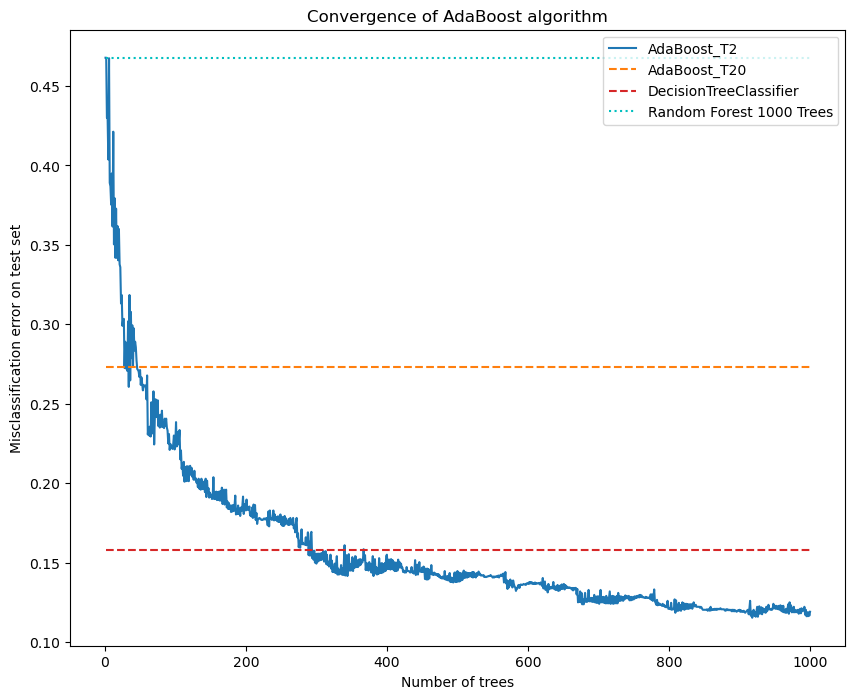

In [14]:



ax = boosting_errors.plot(figsize=(10,8))
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")

plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [tree_learner_misclassification_error, tree_learner_misclassification_error],
    color="tab:orange",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [rf_classifiers_misclassification_error, rf_classifiers_misclassification_error],
    color="tab:red",
    linestyle="dashed",
)
plt.plot(
    [boosting_errors.index.min(), boosting_errors.index.max()],
    [
        dummy_classifiers_misclassification_error,
        dummy_classifiers_misclassification_error,
    ],
    color="c",
    linestyle="dotted",
)
plt.legend(["AdaBoost_T2", "AdaBoost_T20", "DecisionTreeClassifier", "Random Forest 1000 Trees","DummyClassifier"], loc=1)

plt.show()

In [ ]:
from sklearn.tree import plot_tree
#导入决策树画图类

plt.figure(figsize=(8,8))
plot_tree(tree_learner, filled=True)
plt.title("Decision tree")
plt.show()

## 7.2 GBDT nodes数量

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBDT_2 = GradientBoostingClassifier(n_estimators=1000,max_leaf_nodes=2,learning_rate=0.1).fit(X_train, y_train)

GBDT_10 = GradientBoostingClassifier(n_estimators=1000,max_leaf_nodes=10,learning_rate=0.1).fit(X_train, y_train)

GBDT_100 = GradientBoostingClassifier(n_estimators=1000,max_leaf_nodes=100,learning_rate=0.1).fit(X_train, y_train)

In [ ]:
GBDT_errors = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "AdaBoost": [
            misclassification_error(y_test, y_pred)
            for y_pred in adaboost_clf.staged_predict(X_test)
        ],
        "GBDT 2": [
            misclassification_error(y_test, y_pred)
            for y_pred in GBDT_2.staged_predict(X_test)
        ],
        "GBDT 10": [
            misclassification_error(y_test, y_pred)
            for y_pred in GBDT_10.staged_predict(X_test)
        ],
        "GBDT 100": [
            misclassification_error(y_test, y_pred)
            for y_pred in GBDT_100.staged_predict(X_test)
        ],
    }
).set_index("Number of trees")

In [ ]:



ax = GBDT_errors.plot(figsize=(10,8))
ax.set_ylabel("Misclassification error on test set")
ax.set_title("Convergence of AdaBoost algorithm")


plt.legend(["AdaBoost", "GBDT Node=2","GBDT Node=10", "GBDT Node=100"], loc=1)

plt.show()

## 7.3 GBDT的正则化

In [ ]:
original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure(figsize=(10,8))

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X_test)):
        test_deviance[i] = 2 * log_loss(y_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()